In [3]:
# importing the depedencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load the dataset
data = pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# checking data statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# checking the number of rows and columns
data.shape

(614, 13)

In [7]:
# checking if there are null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# checking the number of unique values in the column
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
# import simple imputer 
from sklearn.impute import SimpleImputer

In [10]:
# applying simple imputer in the columns strategy: most_frequent
#most frequent
impute = SimpleImputer(strategy='most_frequent')
data['Gender'] = impute.fit_transform(data[['Gender']]).ravel()
data['Married'] = impute.fit_transform(data[['Married']]).ravel()
data['Dependents'] = impute.fit_transform(data[['Dependents']]).ravel()
data['Self_Employed'] = impute.fit_transform(data[['Self_Employed']]).ravel()
data['Loan_Amount_Term'] = impute.fit_transform(data[['Loan_Amount_Term']]).ravel()
data['Credit_History'] = impute.fit_transform(data[['Credit_History']]).ravel()


In [11]:
# applying simple imputer in the columns strategy: mean 
#mean
impute_mean = SimpleImputer(strategy='mean')
data['LoanAmount'] = impute_mean.fit_transform(data[['LoanAmount']])
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [12]:
#checking if the simple imputer worked properly
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#checking the unique values of the column
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
# applying get dummies to columns in ordet to have numerical data
data_encoded= pd.get_dummies(data, columns=['Gender', 'Married', 'Self_Employed', 'Education','Loan_Status'], dtype=int)
data_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Loan_Status_N,Loan_Status_Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,Urban,0,1,1,0,1,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,1,1,0,1,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,Urban,0,1,0,1,0,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,1,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,Urban,0,1,1,0,1,0,1,0,0,1


In [15]:
#gender male 1 female 0
#married yes 1  no 0
#selemployed yes 1 no 0
#education graduate 1 not graduate 0
#loan status yes 1 no 0

In [16]:
# dropping columns and renaming after applying get dummies
drop = ['Gender_Female', 'Married_No', 'Self_Employed_No', 'Education_Not Graduate', 'Loan_Status_N']
data_encoded = data_encoded.drop(drop, axis=1)
rename = {'Gender_Male': 'Gender', 'Married_Yes':'Married', 'Self_Employed_Yes':'Self_Employed', 'Education_Graduate':'Graduate', 'Loan_Status_Y': 'Loan_Status'} 
data_encoded = data_encoded.rename(columns=rename)

In [17]:
#checking if the dropping and renaming was applied correctly
data_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Self_Employed,Graduate,Loan_Status
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,0,1,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,Rural,1,1,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,Urban,1,1,1,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,1,1


In [18]:
# checking the unique values of the column
data_encoded['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [19]:
# transforming the items in numerical data
a = {'Urban': 0,
     'Rural': 1,
     'Semiurban':2}

data_encoded['Property_Area'] = data_encoded['Property_Area'].map(a)
data_encoded['Property_Area'].head()

0    0
1    1
2    0
3    0
4    0
Name: Property_Area, dtype: int64

In [20]:
# checking the transformaation
data_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Self_Employed,Graduate,Loan_Status
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,1,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,0,1,1,1,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,0,1,1,0,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,0,1,0,0,1,1


In [21]:
# dropping unecessery column
data_encoded = data_encoded.drop(columns='Loan_ID')
data_encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Self_Employed,Graduate,Loan_Status
0,0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,1,0
2,0,3000,0.0,66.000000,360.0,1.0,0,1,1,1,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,0,1,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,0,1,0,0,1,1


In [22]:
data_encoded['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
# setting a numerical data in the column
data_encoded['Dependents'] = data_encoded['Dependents'].replace(to_replace='3+', value=4)

In [24]:
data_encoded['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [25]:
# creating a feature correlation variable
corr = data_encoded.corr()

<Axes: xlabel='Graduate', ylabel='count'>

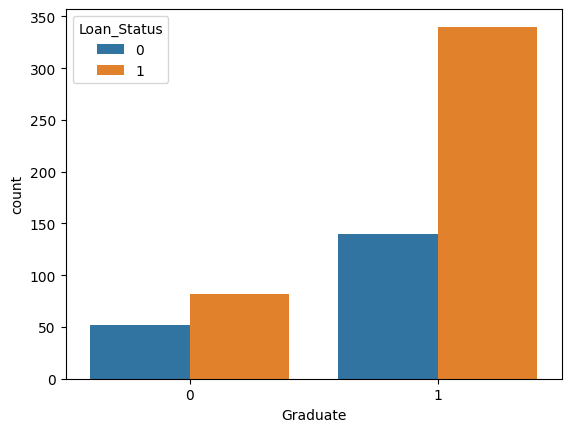

In [26]:
#vizualizing data features
sns.countplot(x='Graduate', hue='Loan_Status', data=data_encoded)

<Axes: xlabel='Married', ylabel='count'>

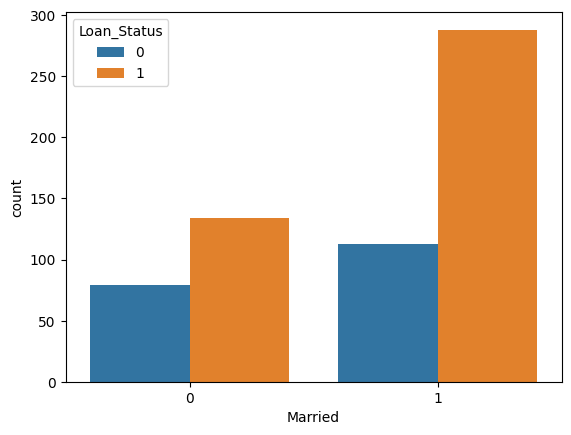

In [27]:
#vizualizing data features

sns.countplot(x='Married', hue='Loan_Status', data=data_encoded)

<Axes: >

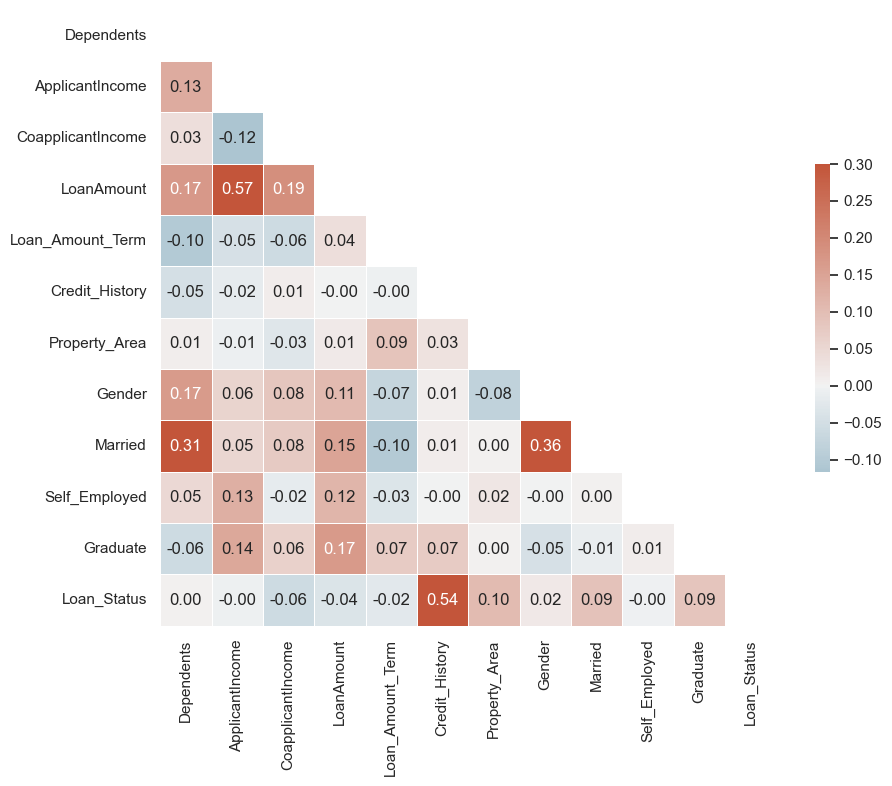

In [28]:
# plotting the features correlation 

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
# splitting the data in features and target
X = data_encoded.drop(['Loan_Status'], axis=1)
y = data_encoded['Loan_Status']

In [30]:
# checking the number of values of each outcome
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [31]:
data_encoded.shape

(614, 12)

In [32]:
# split the data in train and test
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.25, stratify=y)


In [34]:
# importing the model
from sklearn.svm import SVC

model = SVC(kernel='linear')

In [35]:
# training and prediction train data
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [36]:
# importing metrics to analyze the results
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# accuracy score for train data
acc = accuracy_score(y_train, pred)
acc

0.8043478260869565

In [38]:
# predicting test data
pred_test = model.predict(X_test)

In [39]:
# accuracy score for test data
acc = accuracy_score(y_test, pred_test)
acc

0.7987012987012987

In [40]:
classification = classification_report(y_test, pred_test)
print(classification)

              precision    recall  f1-score   support

           0       0.81      0.46      0.59        48
           1       0.80      0.95      0.87       106

    accuracy                           0.80       154
   macro avg       0.81      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154

